# Logistic Regression

Linear regression works well when the target column we're trying to predict, the dependent variable, is ordered and continuous

In classification problems, our target column has a finite set of possible values which represent different categories a row can belong to

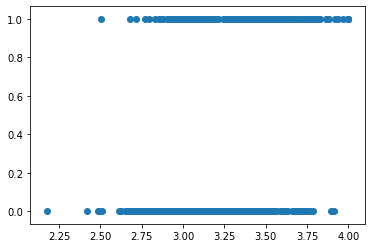

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
admissions = pd.read_csv("admissions.csv")
plt.scatter(admissions['gpa'], admissions['admit'])
plt.show()

Classification focuses on estimating the relationship between the independent variables and the dependent, categorical variable

logistic regression model outputs a probability value

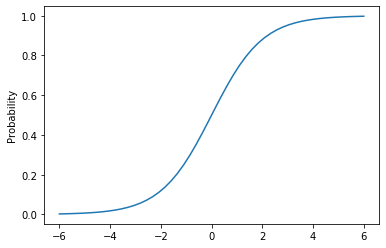

In [4]:
# Logistic Function
def logistic(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logistic function.
y = logistic(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(admissions[["gpa"]], admissions["admit"])

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

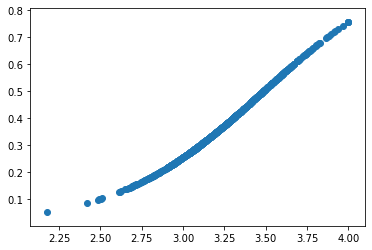

In [6]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

pred_probs = logistic_model.predict_proba(admissions[["gpa"]])
plt.scatter(admissions["gpa"], pred_probs[:,1])

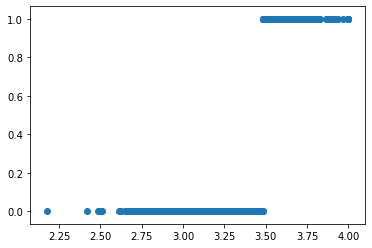

In [7]:
# Fitted Labels

fitted_labels = logistic_model.predict(admissions[["gpa"]])
plt.scatter(admissions["gpa"], fitted_labels)

## Introduction to evaluating binary classifiers

 - `gre` - applicant's score on the Graduate Record Exam, a generalized test for prospective graduate students.
   - Score ranges from 200 to 800.
 - `gpa` - college grade point average.
   - Continuous between 0.0 and 4.0.
 - `admit` - binary value
   - Binary value, 0 or 1, where 1 means the applicant was admitted to the program and 0 means the applicant was rejected.

In [8]:
admissions = pd.read_csv("admissions.csv")
model = LogisticRegression()
model.fit(admissions[["gpa"]], admissions["admit"])

labels = model.predict(admissions[["gpa"]])
admissions["predicted_label"] = labels
print(admissions["predicted_label"].value_counts())
print(admissions.head())

0    507
1    137
Name: predicted_label, dtype: int64
   admit       gpa         gre  predicted_label
0      0  3.177277  594.102992                0
1      0  3.412655  631.528607                0
2      0  2.728097  553.714399                0
3      0  3.093559  551.089985                0
4      0  3.141923  537.184894                0


#### Accuracy: What fraction of the predictions were correct (actual label matched predicted label)?

In [9]:
admissions["actual_label"] = admissions["admit"]
matches = admissions["predicted_label"] == admissions["actual_label"]
correct_predictions = admissions[matches]
print(correct_predictions.head())
accuracy = len(correct_predictions) / len(admissions)
print(accuracy)

   admit       gpa         gre  predicted_label  actual_label
0      0  3.177277  594.102992                0             0
1      0  3.412655  631.528607                0             0
2      0  2.728097  553.714399                0             0
3      0  3.093559  551.089985                0             0
4      0  3.141923  537.184894                0             0
0.6847826086956522


In [10]:
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])

true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])

print(true_positives)
print(true_negatives)

89
352


In [11]:
# Sensitivity

true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])

false_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 1)
false_negatives = len(admissions[false_negative_filter])

sensitivity = true_positives / (true_positives + false_negatives)

print(sensitivity)

0.36475409836065575


In [12]:
# Specificity 

false_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 0)
false_positives = len(admissions[false_positive_filter])
specificity = (true_negatives) / (false_positives + true_negatives)
print(specificity)

0.88


# Multiclass classification

UCI Machine Learning repository  https://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cars = pd.read_csv("auto.csv")

print(cars.head())

unique_regions = cars['origin'].unique()
print(unique_regions)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0  3504.0          12.0    70   
1  15.0          8         350.0       165.0  3693.0          11.5    70   
2  18.0          8         318.0       150.0  3436.0          11.0    70   
3  16.0          8         304.0       150.0  3433.0          12.0    70   
4  17.0          8         302.0       140.0  3449.0          10.5    70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  
[1 3 2]


For this dataset, categorical variables exist in three columns: 
`cylinders`, `year`, and `origin`. The `cylinders` and `year` columns must be converted to numeric values so we can use them to predict label `origin`.

In [14]:
dummy_cylinders = pd.get_dummies(cars["cylinders"], prefix="cyl")
cars = pd.concat([cars, dummy_cylinders], axis=1)

dummy_years = pd.get_dummies(cars['year'], prefix='year')
cars = pd.concat([cars, dummy_years], axis=1)

cars = cars.drop("year", axis=1)
cars = cars.drop("cylinders", axis=1)
print(cars.head())

    mpg  displacement  horsepower  weight  acceleration  origin  cyl_3  cyl_4  \
0  18.0         307.0       130.0  3504.0          12.0       1      0      0   
1  15.0         350.0       165.0  3693.0          11.5       1      0      0   
2  18.0         318.0       150.0  3436.0          11.0       1      0      0   
3  16.0         304.0       150.0  3433.0          12.0       1      0      0   
4  17.0         302.0       140.0  3449.0          10.5       1      0      0   

   cyl_5  cyl_6  ...  year_73  year_74  year_75  year_76  year_77  year_78  \
0      0      0  ...        0        0        0        0        0        0   
1      0      0  ...        0        0        0        0        0        0   
2      0      0  ...        0        0        0        0        0        0   
3      0      0  ...        0        0        0        0        0        0   
4      0      0  ...        0        0        0        0        0        0   

   year_79  year_80  year_81  year_82  
0   

In [15]:
# randomize the DataFrame
shuffled_rows = np.random.permutation(cars.index)
shuffled_cars = cars.iloc[shuffled_rows]

# Assign first 70% to train, 30% to test
highest_train_row = int(cars.shape[0] * .70)
train = shuffled_cars.iloc[0:highest_train_row]
test = shuffled_cars.iloc[highest_train_row:]

In [17]:
train.head()



,mpg,displacement,horsepower,weight,acceleration,origin,cyl_3,cyl_4,cyl_5,cyl_6,...,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
297,27.2,141.0,71.0,3190.0,24.8,2,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
156,16.0,318.0,150.0,4498.0,14.5,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
121,24.0,121.0,110.0,2660.0,14.0,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
353,31.6,120.0,74.0,2635.0,18.3,3,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
56,24.0,113.0,95.0,2278.0,15.5,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
test.head()

,mpg,displacement,horsepower,weight,acceleration,origin,cyl_3,cyl_4,cyl_5,cyl_6,...,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
272,20.3,131.0,103.0,2830.0,15.9,2,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
119,19.0,121.0,112.0,2868.0,15.5,2,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
66,11.0,429.0,208.0,4633.0,11.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,31.0,79.0,67.0,1950.0,19.0,3,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
218,33.5,85.0,70.0,1945.0,16.8,3,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
# Create a model for each category

'''
A model where all cars built in North America are considered Positive (1) 
and those built in Europe and Asia are considered Negative (0).

A model where all cars built in Europe are considered Positive (1) 
and those built in North America and Asia are considered Negative (0).

A model where all cars built in Asia are labeled Positive (1) 
and those built in North America and Europe are considered Negative (0).

'''

unique_origins = cars["origin"].unique()
unique_origins.sort()

models = {}
features = [c for c in train.columns if c.startswith("cyl") or c.startswith("year")]

for origin in unique_origins:
    model = LogisticRegression()
    
    X_train = train[features]
    y_train = train["origin"] == origin

    model.fit(X_train, y_train)
    models[origin] = model

In [21]:
testing_probs = pd.DataFrame(columns=unique_origins)

for origin in unique_origins:
    # Select testing features.
    X_test = test[features]   
    # Compute probability of observation being in the origin.
    testing_probs[origin] = models[origin].predict_proba(X_test)[:,1]

In [22]:
# Choose the origin

predicted_origins = testing_probs.idxmax(axis=1)
print(predicted_origins)

0      1
1      2
2      1
3      2
4      1
      ..
113    2
114    1
115    1
116    1
117    1
Length: 118, dtype: int64


# Overfitting

While exploring regression, we've briefly mentioned overfitting and the problems it can cause. In this mission, we'll explore how to identify overfitting and what you can do to avoid it. To explore overfitting, we'll use a dataset `auto-mpg.data` on cars which contains 7 numerical features that could have an effect on a car's fuel efficiency:

 - `cylinders` -- the number of cylinders in the engine.
 - `displacement` -- the displacement of the engine.
 - `horsepower` -- the horsepower of the engine.
 - `weight` -- the weight of the car.
 - `acceleration` -- the acceleration of the car.
 - `model year` -- the year that car model was released (e.g. 70 corresponds to 1970).
 - `origin` -- where the car was manufactured (0 if North America, 1 if Europe, 2 if Asia).

The `mpg` column is our target column and is the one we want to predict using the other features.

The dataset is hosted by the University of California Irvine on their machine learning repository. You'll notice that the Data Folder contains a few different files. We'll be working with auto-mpg.data, which omits the 8 rows containing missing values for fuel efficiency (mpg column).

The starter code imports Pandas, reads the data into a Dataframe, and cleans up some messy values. Explore the dataset to become more familiar with it.

Reading the starter code, you might discover some different syntax. If you run the code locally in Jupyter Notebook or Jupyter Lab, you'll notice what is known as a SettingWithCopy Warning. This won't prevent your code from running properly but it's just letting you know that whatever operation you're doing is trying to be set on a copy of a slice from a dataframe. To get around this, it's considered good practice to include `.copy()` whenever you perform operations on a dataframe.

In [23]:
import pandas as pd
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("auto-mpg.data", delim_whitespace=True, names=columns)
filtered_cars = cars[cars['horsepower'] != '?'].copy()
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

In [24]:
filtered_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [26]:
filtered_cars.shape

(392, 9)

Bias and Variance http://scott.fortmann-roe.com/docs/BiasVariance.html

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def train_and_test(cols):
    # Split into features & target
    features = filtered_cars[cols]
    target = filtered_cars['mpg']
    
    # Fit model
    lr = LinearRegression()
    lr.fit(features, target)
    
    # Make predictions on training set
    predictions = lr.predict(features)
    
    # Compute MSE and Variance
    mse = mean_squared_error(filtered_cars['mpg'], predictions)
    variance = np.var(predictions)
    return(mse, variance)

cyl_mse, cyl_var = train_and_test(["cylinders"])
weight_mse, weight_var = train_and_test(["weight"])

print(cyl_mse, cyl_var, weight_mse, weight_var)

24.020179568155537 36.74255887416014 18.6766165974193 42.08612184489639


In [30]:
one_mse, one_var = train_and_test(["cylinders"])
two_mse, two_var = train_and_test(["cylinders", "displacement"])
three_mse, three_var = train_and_test(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_test(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

print(seven_mse, seven_var)

10.847480945000449 49.91525749731511


## Cross-validation

A good way to detect if your model is overfitting is to compare the in-sample error and the out-of-sample error, or the training error with the test error. So far, we calculated the in sample error by testing the model over the same data it was trained on. To calculate the out-of-sample error, we need to test the data on a test set of data. We unfortunately don't have a separate test dataset and we'll instead use cross validation.

In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

def train_and_cross_val(cols):
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    
    variance_values = []
    mse_values = []
    
    # KFold instance.
    kf = KFold(n_splits=10, shuffle=True, random_state=3)
    
    # Iterate over each fold.
    for train_index, test_index in kf.split(features):
        # Training and test sets.
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        
        # Fit the model and make predictions.
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)
        
        # Calculate mse and variance values for this fold.
        mse = mean_squared_error(y_test, predictions)
        var = np.var(predictions)

        # Append to arrays to calculate overall average mse and variance values.
        variance_values.append(var)
        mse_values.append(mse)
   
    # Compute average mse and variance values.
    avg_mse = np.mean(mse_values)
    avg_var = np.mean(variance_values)
    return(avg_mse, avg_var)
        
two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

print(seven_mse, seven_var)

11.41813197181206 49.90431373098732


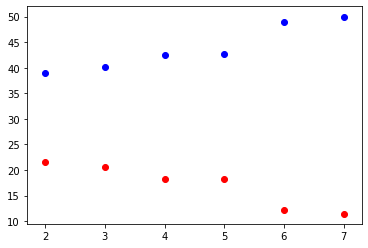

In [34]:
# Plotting cross-validation error vs. cross-validation variance
plt.scatter([2,3,4,5,6,7], [two_mse, three_mse, four_mse, five_mse, six_mse, seven_mse], c='red')
plt.scatter([2,3,4,5,6,7], [two_var, three_var, four_var, five_var, six_var, seven_var], c='blue')
plt.show()

# Clustering

https://flowingdata.com/2012/03/21/redefining-nba-basketball-positions/

In [59]:
votes = pd.read_csv("114_congress.csv")

print(votes.head())

        name party state  00001  00004  00005  00006  00007  00008  00009  \
0  Alexander     R    TN    0.0    1.0    1.0    1.0    1.0    0.0    0.0   
1     Ayotte     R    NH    0.0    1.0    1.0    1.0    1.0    0.0    0.0   
2    Baldwin     D    WI    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
3   Barrasso     R    WY    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
4     Bennet     D    CO    0.0    0.0    0.0    1.0    0.0    1.0    0.0   

   00010  00020  00026  00032  00038  00039  00044  00047  
0    1.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0  
1    1.0    0.0    1.0    0.0    1.0    0.0    1.0    0.0  
2    1.0    0.0    0.0    1.0    1.0    0.0    1.0    1.0  
3    1.0    1.0    1.0    0.0    0.0    1.0    0.0    0.0  
4    1.0    0.0    0.0    0.0    1.0    0.0    1.0    0.0  


In [60]:
# unique_regions = votes['party'].unique()
# print(unique_regions)

In [61]:
print(votes["party"].value_counts())
print(votes.mean())

R    54
D    44
I     2
Name: party, dtype: int64
00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64


In [62]:
# Euclidean distance between Senator's votes

from sklearn.metrics.pairwise import euclidean_distances

print(euclidean_distances(votes.iloc[0,3:].values.reshape(1, -1), votes.iloc[1,3:].values.reshape(1, -1)))

distance = euclidean_distances(votes.iloc[0,3:].values.reshape(1, -1), votes.iloc[2,3:].values.reshape(1, -1))
print(distance)

[[1.73205081]]
[[3.31662479]]


In [63]:
# k-means clustering uses Euclidean distance to form clusters
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=1)
senator_distances = kmeans_model.fit_transform(votes.iloc[:, 3:])
# print(senator_distances)

In [64]:
# Pandas method crosstab() to compute and display each cluster group

labels = kmeans_model.labels_
print(pd.crosstab(labels, votes["party"]))

party   D  I   R
row_0           
0       3  0  54
1      41  2   0


In [65]:
# votes[(labels == 0) & (votes["party"] == "I")]

In [66]:
democratic_outliers = votes[(labels == 1) & (votes["party"] == "D")]
print(democratic_outliers)

          name party state  00001  00004  00005  00006  00007  00008  00009  \
2      Baldwin     D    WI    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
4       Bennet     D    CO    0.0    0.0    0.0    1.0    0.0    1.0    0.0   
5   Blumenthal     D    CT    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
7       Booker     D    NJ    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
9        Boxer     D    CA    0.5    0.0    0.0    1.0    0.0    1.0    0.0   
10       Brown     D    OH    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
12    Cantwell     D    WA    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
14      Cardin     D    MD    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
15      Carper     D    DE    0.0    0.0    0.0    1.0    0.0    1.0    0.0   
16       Casey     D    PA    0.0    0.0    0.0    1.0    0.0    1.0    1.0   
21       Coons     D    DE    1.0    0.0    0.0    1.0    0.0    1.0    0.0   
28    Donnelly     D    IN    0.0    0.0    0.0    1

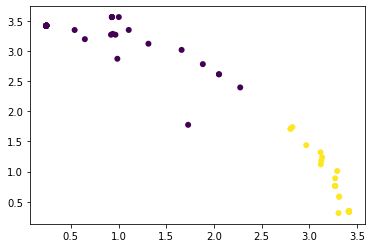

In [67]:
plt.scatter(x=senator_distances[:,0], y=senator_distances[:,1], c=labels, linewidths=0)
plt.show()

In [68]:
# Finding the most extreme

extremism = (senator_distances ** 3).sum(axis=1)
votes["extremism"] = extremism
votes.sort_values("extremism", inplace=True, ascending=False)
print(votes.head(10))

         name party state  00001  00004  00005  00006  00007  00008  00009  \
98     Wicker     R    MS    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
53   Lankford     R    OK    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
69       Paul     R    KY    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
80      Sasse     R    NE    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
26       Cruz     R    TX    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
48    Johnson     R    WI    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
47    Isakson     R    GA    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
65  Murkowski     R    AK    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
64      Moran     R    KS    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
30       Enzi     R    WY    0.0    1.0    1.0    1.0    1.0    0.0    1.0   

    00010  00020  00026  00032  00038  00039  00044  00047  extremism  
98    0.0    1.0    1.0    0.0    0.0    1.0    0.0    0.0  46.250476

# K-means clustering

dataset of player performance from the 2013-2014 season.

Here are some selected columns:

 - `player` -- name of the player
 - `pos` -- the position of the player
 - `g` -- number of games the player was in
 - `pts` -- total points the player scored
 - `fg.` -- field goal percentage
 - `ft.` -- free throw percentage
 
 http://www.databasebasketball.com/about/aboutstats.htm

In [69]:
nba = pd.read_csv("nba_2013.csv")
nba.head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013


Point guards play one of the most crucial roles on a team because their primary responsibility is to create scoring opportunities for the team. 

We are going to focus our lesson on a machine learning technique called clustering, which allows us to visualize the types of point guards as well as group similar point guards together. 


Using 2 features allows us to easily visualize the players and will also make it easier to grasp how clustering works. 
- For point guards, it's widely accepted that the `Assist to Turnover Ratio` is a good indicator for performance in games as it quantifies the number of scoring opportunities that player created. 
 - Let's also use `Points Per Game`, since effective `Point Guards` not only set up scoring opportunities but also take a lot of the shots themselves.
 
Steps:
 - Create a new Dataframe which contains just the point guards from the data set.
   - Point guards are specified as PG in the pos column.
 - Assign the filtered data frame to point_guards.

In [85]:
nba = pd.read_csv("nba_2013.csv")
nba.head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013


In [86]:
point_guards = nba[nba['pos'] == 'PG']

In [87]:
# Create points per game values
point_guards['ppg'] = point_guards['pts'] / point_guards['g']

# Sanity check, make sure ppg = pts/g
point_guards[['pts', 'g', 'ppg']].head(5)

/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,pts,g,ppg
24,930,71,13.098592
29,150,20,7.500000
30,660,79,8.354430
38,666,72,9.250000
50,378,55,6.872727


Let's create a column, `atr`, for the Assist Turnover Ratio, which is calculated by dividing total assists (`ast`) by total turnovers (`tov`)

In [88]:
# Drop point gaurds with 0 Turnovers, can't divide by zero
point_guards = point_guards[point_guards['tov'] != 0]


point_guards['atr'] = point_guards['ast'] / point_guards['tov']

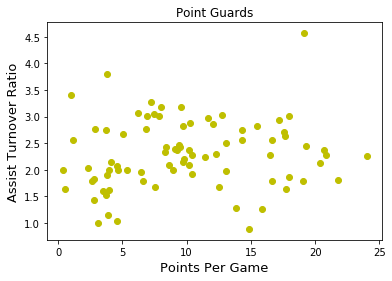

In [89]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c='y')
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

There seem to be 5 general regions, or clusters, that the point guards fall into (with a few outliers of course!). We can use a technique called clustering to segment all of the point guards into groups of alike players. While regression and other supervised machine learning techniques work well when we have a clear metric we want to optimize for and lots of pre-labelled data, we need to instead use unsupervised machine learning techniques to explore the structure within a data set that doesn't have a clear value to optimize.

There are multiple ways of clustering data but here we will focus on centroid based clustering for this lesson. Centroid based clustering works well when the clusters resemble circles with centers (or centroids). The centroid represent the arithmetic mean of all of the data points in that cluster.

K-Means Clustering is a popular centroid-based clustering algorithm that we will use. The K in K-Means refers to the number of clusters we want to segment our data into. The key part with K-Means (and most unsupervised machine learning techniques) is that we have to specify what `k` is. There are advantages and disadvantages to this, but one advantage is that we can pick the `k` that makes the most sense for our use case. We'll set `k` to 5 since we want K-Means to segment our data into 5 clusters

K-Means is an iterative algorithm that switches between recalculating the centroid of each cluster and the players that belong to that cluster. To start, select 5 players at random and assign their coordinates as the initial centroids of the just created clusters.

Step 1 (Assign Points to Clusters) For each player, calculate the Euclidean distance between that player's coordinates, or values for atr & ppg, and each of the centroids' coordinates. Assign the player to the cluster whose centroid is the closest to, or has the lowest Euclidean distance to, the player's values.

Step 2 (Update New Centroids of the Clusters) For each cluster, compute the new centroid by calculating the arithmetic mean of all of the points (players) in that cluster. We calculate the arithmetic mean by taking the average of all of the X values (atr) and the average of all of the Y values (ppg) of the points in that cluster.

Iterate Repeat steps 1 & 2 until the clusters are no longer moving and have converged.

In [90]:
num_clusters = 5
# Use numpy's random function to generate a list, length: num_clusters, of indices
random_initial_points = np.random.choice(point_guards.index, size=num_clusters)
# Use the random indices to create the centroids
centroids = point_guards.loc[random_initial_points]

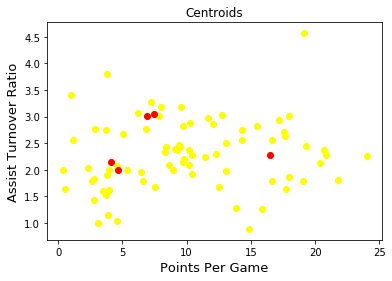

In [91]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c='yellow')
plt.scatter(centroids['ppg'], centroids['atr'], c='red')
plt.title("Centroids")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)
plt.show()

While the centroids data frame object worked well for the initial centroids, where the centroids were just a subset of players, as we iterate the centroids' values will be coordinates that may not match another player's coordinates. Moving forward, let's use a dictionary object instead to represent the centroids.

We will need a unique identifier, like `cluster_id`, to refer to each cluster's centroid and a list representation of the centroid's coordinates (or values for `ppg` and `atr`). Let's create a dictionary then with the following mapping:

 - key: cluster_id of that centroid's cluster
 - value: centroid's coordinates expressed as a list ( ppg value first, atr value second )

To generate the cluster_ids, let's iterate through each centroid and assign an integer from 0 to k-1. For example, the first centroid will have a cluster_id of 0, while the second one will have a cluster_id of 1. We'll write a function, centroids_to_dict, that takes in the centroids data frame object, creates a cluster_id and converts the ppg and atr values for that centroid into a list of coordinates, and adds both the cluster_id and coordinates_list into the dictionary that's returned.

In [92]:
def centroids_to_dict(centroids):
    dictionary = dict()
    # iterating counter we use to generate a cluster_id
    counter = 0

    # iterate a pandas data frame row-wise using .iterrows()
    for index, row in centroids.iterrows():
        coordinates = [row['ppg'], row['atr']]
        dictionary[counter] = coordinates
        counter += 1

    return dictionary

centroids_dict = centroids_to_dict(centroids)

Before we can assign players to clusters, we need a way to compare the `ppg` and `atr` values of the players with each cluster's centroids. 

Euclidean distance is the most common technique used in data science for measuring distance between vectors and works extremely well in 2 and 3 dimensions.

In [93]:
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference

    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

q = [5, 2]
p = [3,1]

# Sqrt(5) = ~2.24
print(calculate_distance(q, p))

2.23606797749979


In [94]:
# point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

def assign_to_cluster(row):
    lowest_distance = -1
    closest_cluster = -1
    
    for cluster_id, centroid in centroids_dict.items():
        df_row = [row['ppg'], row['atr']]
        euclidean_distance = calculate_distance(centroid, df_row)
        
        if lowest_distance == -1:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id 
        elif euclidean_distance < lowest_distance:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
    return closest_cluster

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

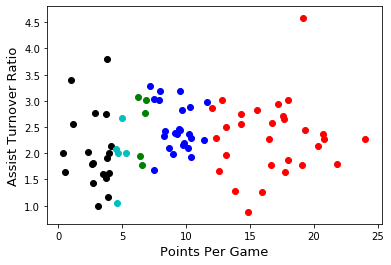

In [95]:
# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['atr'], c=colors[n-1])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)
    plt.show()

visualize_clusters(point_guards, 5)

In [96]:
# Step 2 Update new centroids

def recalculate_centroids(df):
    new_centroids_dict = dict()
    
    for cluster_id in range(0, num_clusters):
        values_in_cluster = df[df['cluster'] == cluster_id]
        # Calculate new centroid using mean of values in the cluster
        new_centroid = [np.average(values_in_cluster['ppg']), np.average(values_in_cluster['atr'])]
        new_centroids_dict[cluster_id] = new_centroid
    return new_centroids_dict

centroids_dict = recalculate_centroids(point_guards)

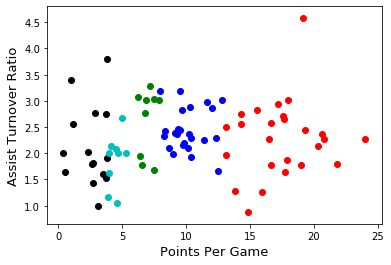

In [97]:
# Repeat Step 1. Assign points to clusters

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

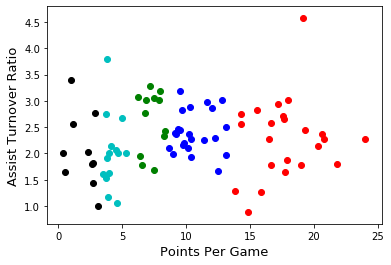

In [98]:
# Repeat step 2 and step 1

centroids_dict = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

K-Means doesn't cause massive changes in the makeup of clusters between iterations, meaning that it will always converge and become stable
Because K-Means is conservative between iterations, where we pick the initial centroids and how we assign the players to clusters initially matters a lot

`sklearn` implementation of K-Means does some intelligent things like re-running the entire clustering process lots of times with random initial centroids so the final results are a little less biased on the initial centroids

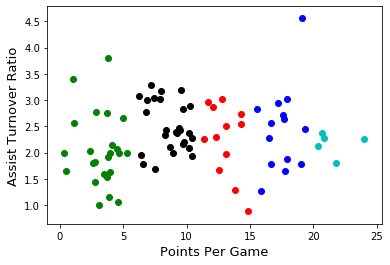

In [99]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['ppg', 'atr']])
point_guards['cluster'] = kmeans.labels_

visualize_clusters(point_guards, num_clusters)